Player with the highest Elo rating:
Position (in January)           1
Name                      Carlsen
ELO                          2872
Date                     2020 Jan
Age                            29
Year                         2020
Name: 20, dtype: object

Top 10 players with the highest Elo ratings:
     Position (in January)      Name   ELO      Date  Age  Year
20                       1   Carlsen  2872  2020 Jan   29  2020
140                      1   Carlsen  2872  2014 Jan   23  2014
0                        1   Carlsen  2862  2021 Jan   30  2021
120                      1   Carlsen  2862  2015 Jan   24  2015
160                      1   Carlsen  2861  2013 Jan   22  2013
420                      1  Kasparov  2851  2000 Jan   36  2000
400                      1  Kasparov  2849  2001 Jan   37  2001
360                      1  Kasparov  2847  2003 Jan   39  2003
100                      1   Carlsen  2844  2016 Jan   25  2016
80                       1   Carlsen  2840  2017 J

C:\Users\kashy\AppData\Local\Temp\ipykernel_19700\1449741647.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_top_10_elo = data.groupby('Year').apply(


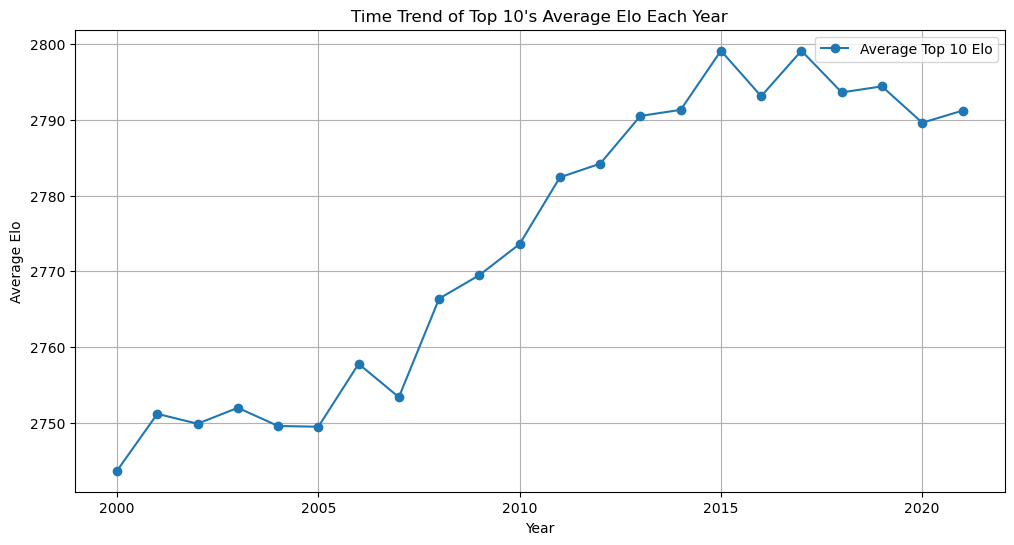

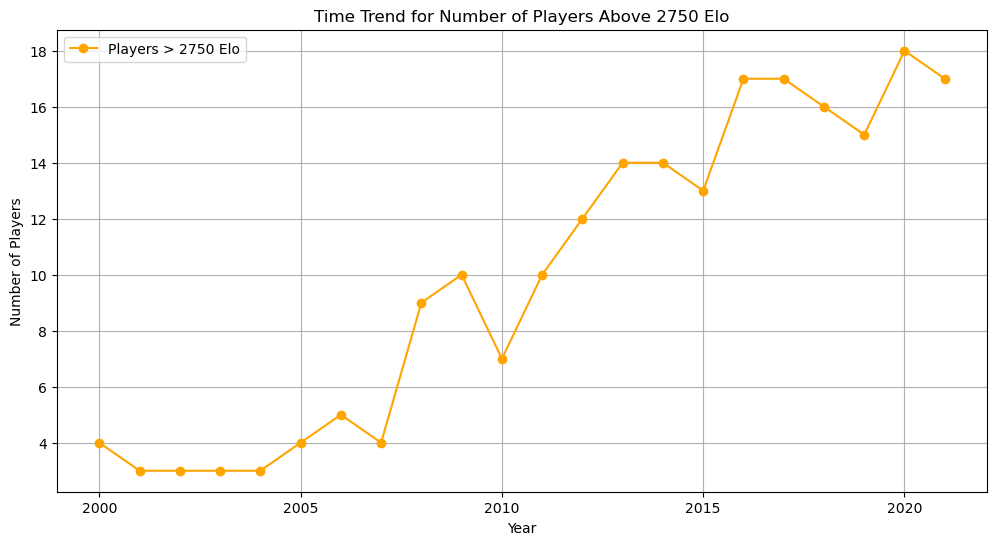

C:\Users\kashy\AppData\Local\Temp\ipykernel_19700\1449741647.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_top_10_age = data.groupby('Year').apply(


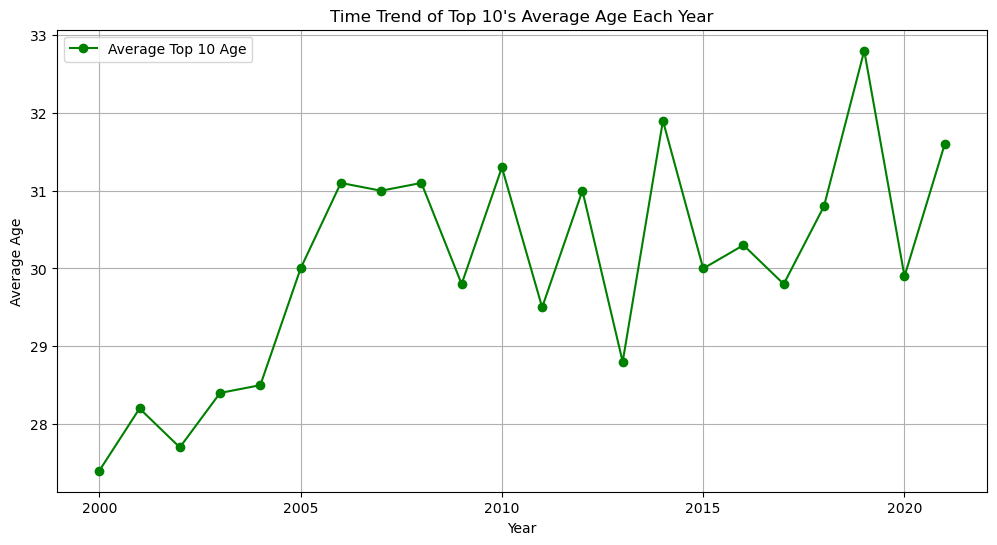

C:\Users\kashy\AppData\Local\Temp\ipykernel_19700\1449741647.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  players_under_25_top_10 = data.groupby('Year').apply(


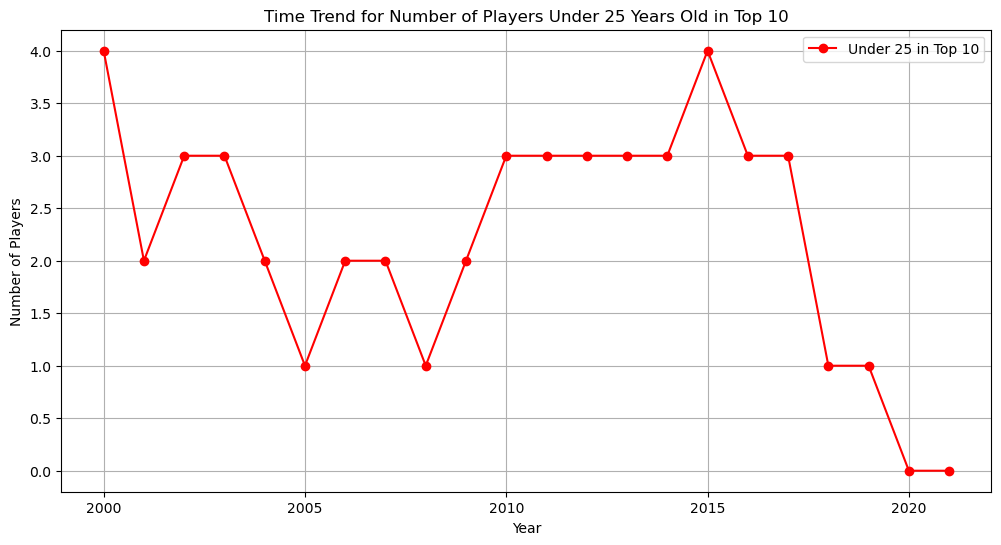

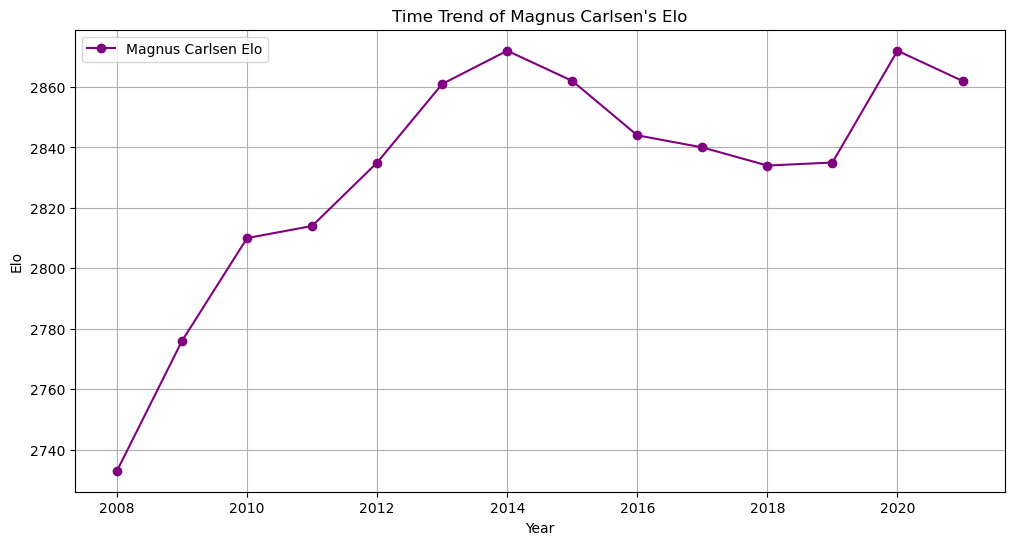

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Chess.csv'
data = pd.read_csv(file_path)

data['Year'] = data['Date'].str[:4].astype(int)

# 1. Identify the player with the highest Elo rating
highest_elo = data.loc[data['ELO'].idxmax()]
print("Player with the highest Elo rating:")
print(highest_elo)

# 2. List the top 10 players with the highest Elo ratings
top_10_elo = data.nlargest(10, 'ELO')
print("\nTop 10 players with the highest Elo ratings:")
print(top_10_elo)

# 3. Time Trend of Top 10's Average Elo Each Year
average_top_10_elo = data.groupby('Year').apply(
    lambda x: x.nlargest(10, 'ELO')['ELO'].mean()
).reset_index(name='Average_ELO')

plt.figure(figsize=(12, 6))
plt.plot(average_top_10_elo['Year'], average_top_10_elo['Average_ELO'], marker='o', label="Average Top 10 Elo")
plt.title("Time Trend of Top 10's Average Elo Each Year")
plt.xlabel("Year")
plt.ylabel("Average Elo")
plt.grid(True)
plt.legend()
plt.show()

# 4. Time Trend for Number of Players Above 2750 Elo
players_above_2750 = data[data['ELO'] > 2750].groupby('Year').size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
plt.plot(players_above_2750['Year'], players_above_2750['Count'], marker='o', color='orange', label="Players > 2750 Elo")
plt.title("Time Trend for Number of Players Above 2750 Elo")
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.grid(True)
plt.legend()
plt.show()

# 5. Time Trend of Top 10's Average Age Each Year
average_top_10_age = data.groupby('Year').apply(
    lambda x: x.nlargest(10, 'ELO')['Age'].mean()
).reset_index(name='Average_Age')

plt.figure(figsize=(12, 6))
plt.plot(average_top_10_age['Year'], average_top_10_age['Average_Age'], marker='o', color='green', label="Average Top 10 Age")
plt.title("Time Trend of Top 10's Average Age Each Year")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.grid(True)
plt.legend()
plt.show()

# 6. Time Trend for Number of Players Under 25 Years Old in Top 10
players_under_25_top_10 = data.groupby('Year').apply(
    lambda x: (x.nlargest(10, 'ELO')['Age'] < 25).sum()
).reset_index(name='Under_25_Count')

plt.figure(figsize=(12, 6))
plt.plot(players_under_25_top_10['Year'], players_under_25_top_10['Under_25_Count'], marker='o', color='red', label="Under 25 in Top 10")
plt.title("Time Trend for Number of Players Under 25 Years Old in Top 10")
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.grid(True)
plt.legend()
plt.show()

# 7. Time Trend of Magnus Carlsen's Elo
magnus_elo = data[data['Name'] == 'Carlsen'].groupby('Year')['ELO'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(magnus_elo['Year'], magnus_elo['ELO'], marker='o', color='purple', label="Magnus Carlsen Elo")
plt.title("Time Trend of Magnus Carlsen's Elo")
plt.xlabel("Year")
plt.ylabel("Elo")
plt.grid(True)
plt.legend()
plt.show()
